<a href="https://colab.research.google.com/github/NourhanDeifSayed/Predicting-Bankruptcy/blob/main/Nourhan_Deif_202201959_Logisitic_Regression_model_with_RFE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Preprocessing**

In [2]:
! pip install lime

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
import shap
from sklearn.model_selection import validation_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import lime
from lime.lime_tabular import LimeTabularExplainer
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

In [4]:
df = pd.read_csv('data.csv')

In [5]:
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [6]:
print(df.shape)

(6819, 96)


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [8]:
print(df.describe())

         Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                          

In [9]:
print(df['Bankrupt?'].value_counts(normalize=True))

Bankrupt?
0    0.967737
1    0.032263
Name: proportion, dtype: float64


In [10]:
df.isnull().sum().sort_values(ascending=False)

,0
Bankrupt?,0
ROA(C) before interest and depreciation before interest,0
ROA(A) before interest and % after tax,0
ROA(B) before interest and depreciation after tax,0
Operating Gross Margin,0
...,...
Liability to Equity,0
Degree of Financial Leverage (DFL),0
Interest Coverage Ratio (Interest expense to EBIT),0
Net Income Flag,0


In [11]:
X = df.drop('Bankrupt?', axis=1)
y = df['Bankrupt?']

In [12]:
num_features = X.shape[1]
print("Number of features:", num_features)

Number of features: 95


In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

In [15]:
X_imputed = imputer.fit_transform(X)

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# **Logistic Regression model**



*   Logistic Regression is a simple linear model used for binary classification tasks (predicting whether a company will go bankrupt or not).


In [94]:
log_reg_model =LogisticRegression(max_iter=1000)

Train the model with all features without feature selection

In [62]:
log_reg_model.fit(X_train, y_train)
y_pred_all_features =log_reg_model.predict(X_test)

In [63]:
accuracy_all_features =accuracy_score(y_test, y_pred_all_features)
print("Model Accuracy with all features:", accuracy_all_features)

Model Accuracy with all features: 0.966275659824047


In [65]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_all_features))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1313
           1       0.63      0.24      0.34        51

    accuracy                           0.97      1364
   macro avg       0.80      0.61      0.66      1364
weighted avg       0.96      0.97      0.96      1364



In [68]:
cm_all_features =confusion_matrix(y_test, y_pred_all_features)
print("\nConfusion Matrix:")
print(cm_all_features)


Confusion Matrix:
[[1306    7]
 [  39   12]]


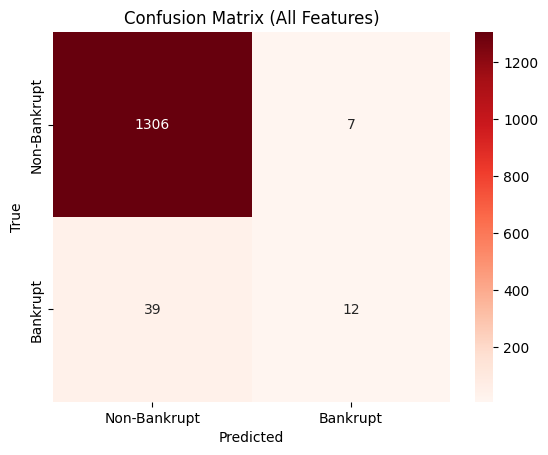

In [69]:
sns.heatmap(cm_all_features, annot=True, fmt='d', cmap='Reds', xticklabels=['Non-Bankrupt', 'Bankrupt'], yticklabels=['Non-Bankrupt', 'Bankrupt'])
plt.title('Confusion Matrix (All Features)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Interpretation of the Confusion Matrix:



*   True Negatives (1306):Correctly predicted Non-Bankrupt.


*   True Positives (12): Correctly predicted Bankrupt.

*  False Negatives (39): Incorrectly predicted Non-Bankrupt when it was actually Bankrupt.



*   False Positives (7): Incorrectly predicted Bankrupt when it was actually Non-Bankrupt.



*   The model performs well in predicting Non-Bankrupt companies (1306 correct predictions).


*  It struggles more with detecting Bankrupt companies, with a higher number of False Negatives (39) than False Positives (7).



Train the model with feature selection by recursive feature elementation

# **RFE**



*   RFE is a feature selection technique that recursively removes the least important features and builds the model on the remaining features. It helps automatically select the most important features.



In [95]:
rfe =RFE(log_reg_model, n_features_to_select=30)
rfe =rfe.fit(X_train, y_train)

In [96]:
selected_features =X.columns[rfe.support_]
print("Selected Features using RFE:", selected_features)

Selected Features using RFE: Index([' Operating Profit Rate',
       ' Non-industry income and expenditure/revenue', ' Cash flow rate',
       ' Net Value Per Share (B)', ' Persistent EPS in the Last Four Seasons',
       ' Revenue Per Share (Yuan ¥)', ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)', ' Cash Reinvestment %',
       ' Total debt/Total net worth', ' Debt ratio %', ' Net worth/Assets',
       ' Borrowing dependency', ' Contingent liabilities/Net worth',
       ' Operating profit/Paid-in capital',
       ' Net profit before tax/Paid-in capital',
       ' Inventory and accounts receivable/Net value',
       ' Net Worth Turnover Rate (times)', ' Cash/Total Assets',
       ' Current Liability to Assets', ' Operating Funds to Liability',
       ' Current Liabilities/Liability', ' Current Liabilities/Equity',
       ' Retained Earnings to Total Assets', ' Cash Turnover Rate',
       ' Cash Flow to Liability', ' CFO to Assets',
       ' 

In [97]:
log_reg_model.fit(X_train[:, rfe.support_], y_train)

LogisticRegression(max_iter=1000)

In [99]:
y_pred = log_reg_model.predict(X_test[:, rfe.support_])

In [100]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9670


In [101]:
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[1308    5]
 [  40   11]]


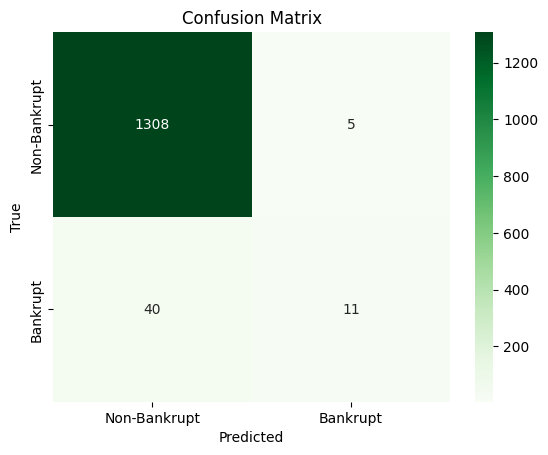

In [102]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Non-Bankrupt', 'Bankrupt'], yticklabels=['Non-Bankrupt', 'Bankrupt'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

After applying feature selection the confusion matrix shows:



*   True Negatives (1308): Correctly predicted Non-Bankrupt.

*   True Positives (11): Correctly predicted Bankrupt.



*  False Negatives (40): Missed Bankrupt companies (predicted Non-Bankrupt).




*   False Positives (5): Incorrectly flagged Non-Bankrupt companies as Bankrupt.



*   False Positives decreased meaning fewer mistakes in predicting Non-Bankrupt as Bankrupt.


*   True Positives slightly improved.




**The learning curve**


The learning curve helps us understand if the model is underfitting or overfitting as we increase the size of the training data.

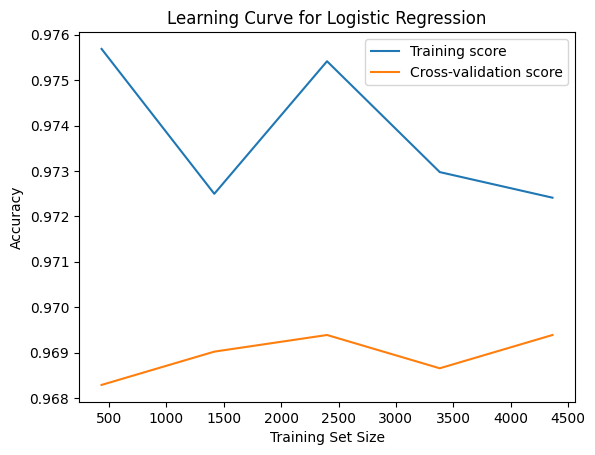

In [30]:
train_sizes, train_scores, test_scores = learning_curve(log_reg_model, X_train[:, rfe.support_], y_train, cv=5, n_jobs=-1)
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Cross-validation score")
plt.title('Learning Curve for Logistic Regression')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



*   The model performs well on the training data.

*  The model also does well on new data, both lines get closer



LIME Implementation



*    LIME is used to interpret a single prediction from the model by approximating the model locally around the prediction with a simpler model.


In [103]:
lime_explainer = LimeTabularExplainer(X_train[:, rfe.support_], feature_names=selected_features, class_names=['Non-Bankrupt', 'Bankrupt'], discretize_continuous=True)

In [105]:
# Choose a data point from the test set to explain (10th instance)
idx = 10
lime_explanation = lime_explainer.explain_instance(X_test[idx, rfe.support_], log_reg_model.predict_proba)

In [106]:
lime_explanation.show_in_notebook()


**Interpretation**

*   Even though there are some negative signs like high debt and negative net worth, the company is still doing well because it has good profits, cash flow, and overall strong financial performance. Because of this, the model predicts with 99% certainty that the company is not bankrupt.




**PDP plot**



*   PDP shows how a feature affects the model's predictions, averaged across all other features.



In [40]:
#Individual features and feature pair for PDP and ICE
features = [0, 1, (0, 1)]

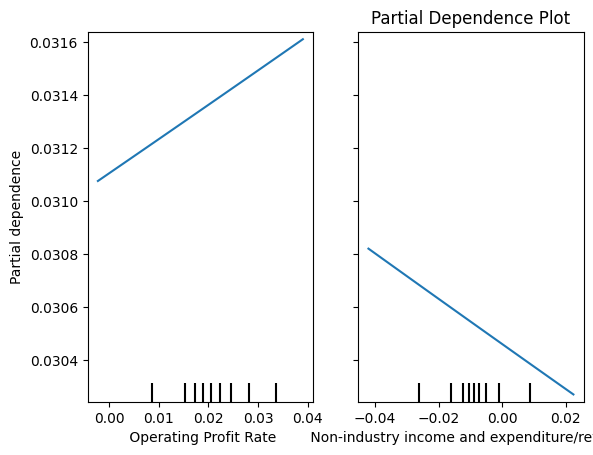

In [41]:
#Partial Dependence Plot
PartialDependenceDisplay.from_estimator(log_reg_model, X_train[:, rfe.support_], features=[0, 1], feature_names=selected_features)
plt.title('Partial Dependence Plot')
plt.show()

**Interpretation**

*   Operating Profit Rate: As the company's operating profit increases, the chances of it being non-bankrupt go up.


*   Non-industry income and expenditure: When the company has higher non-industry income , the chances of it being non-bankrupt decrease, suggesting a higher risk of bankruptcy.



**ICE**



*   ICE shows how a feature's change affects the prediction for individual data points.




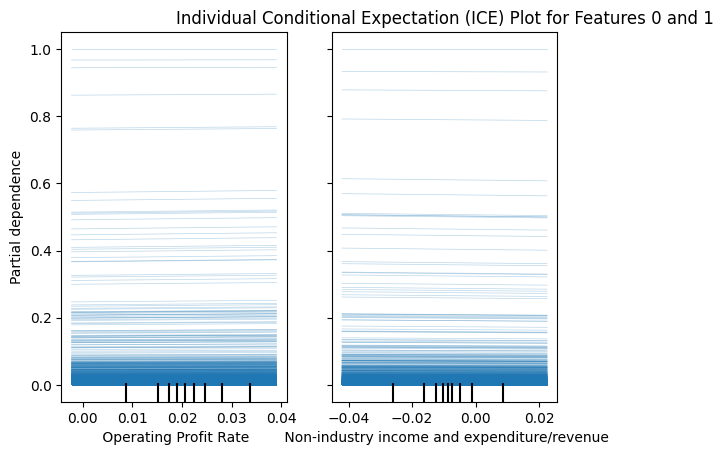

In [42]:
# Plotting Individual Conditional Expectation (ICE) Plot for features 0 and 1 (individual)
PartialDependenceDisplay.from_estimator(log_reg_model, X_train[:, rfe.support_], features=[0, 1], feature_names=selected_features, kind='individual')
plt.title('Individual Conditional Expectation (ICE) Plot for Features 0 and 1')
plt.show()

**Interpretation**

*   Operating Profit Rate: As the company’s operating profit increases, the chance of it being non-bankrupt usually increases, but this effect can vary for different cases.



*   Non-industry income and expenditure: Higher values of non-industry income and expenses tend to lower the chance of being non-bankrupt, but this effect is not the same for every case.









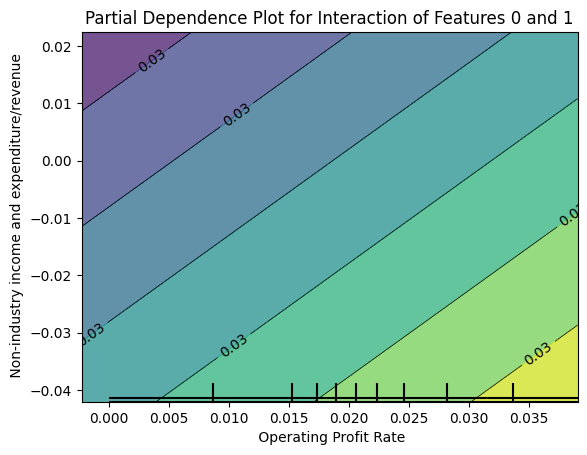

In [43]:
#Plotting Partial Dependence Plot (PDP) for the interaction of features 0 and 1
PartialDependenceDisplay.from_estimator(log_reg_model, X_train[:, rfe.support_], features=[(0, 1)], feature_names=selected_features)
plt.title('Partial Dependence Plot for Interaction of Features 0 and 1')
plt.show()

**Interpretation**

*   the Operating Profit Rate increases, the Non-industry income also changes, suggesting that the two features influence each other.


*  The plot indicates that the combined effect of these two features can either increase or decrease the outcome,depending on their values.



**SHAP**



*   SHAP values explain the contribution of each feature to the model's prediction using Shapley values, which come from cooperative game theory.


*  SHAP gives a global and local explanation of feature importance, which is valuable for model interpretability. It explains how much each feature contributes to a specific prediction.




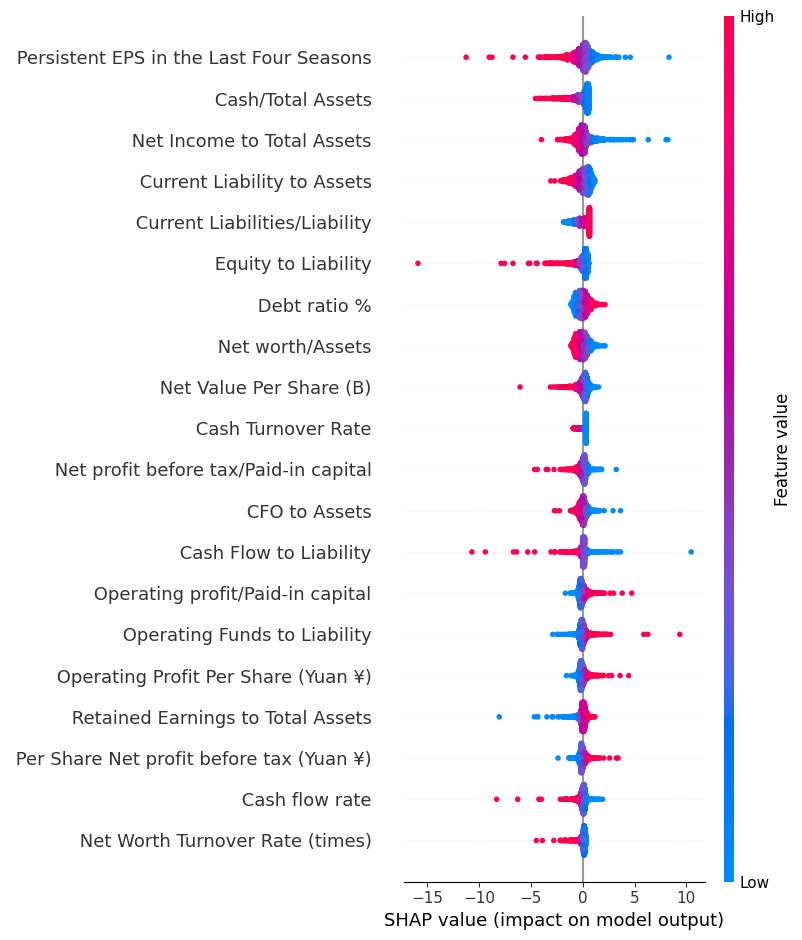

In [48]:
explainer = shap.Explainer(log_reg_model, X_train[:, rfe.support_])
shap_values = explainer(X_test[:, rfe.support_])
shap.summary_plot(shap_values, X_test[:, rfe.support_], feature_names=selected_features)

**Interpretation**




*   Key Features: Features like Persistent EPS in the Last Four Seasons, Cash/Total Assets, and Net Income to Total Assets have the most significant impact on predictions.


*   SHAP Values: Positive SHAP values push predictions towards the positive class (bankruptcy or non-bankruptcy), while negative SHAP values push predictions in the opposite direction.



*   Each point on the horizontal axis of the SHAP summary plot represents the effect of a feature across all data points.

*   The wider horizontal spread indicates that the feature has a different effect on various data points.

*   The narrower horizontal spread shows that the feature has a consistent effect on the data points.


*  The vertical spread in the plot shows how the feature values are distributed for the same SHAP value.



*   The color of the points indicates the feature value range:
               


1.   Red/pink points correspond to higher feature values, which have a stronger effect on the prediction.



2.    Blue/purple points correspond to lower feature values, which have a weaker effect on the model's prediction.










**Permutation Importance**






*   Permutation Importance measures how the model’s performance changes when we randomly shuffle the values of a feature. A large decrease in performance indicates the feature is important.



In [53]:
X_test_selected = X_test[:, rfe.support_]
result = permutation_importance(log_reg_model, X_test_selected, y_test, n_repeats=10, random_state=42)
importance = result.importances_mean

<ipython-input-54-3c4d1e2f1669>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance.sort_values(by='Importance', ascending=False), palette='viridis')


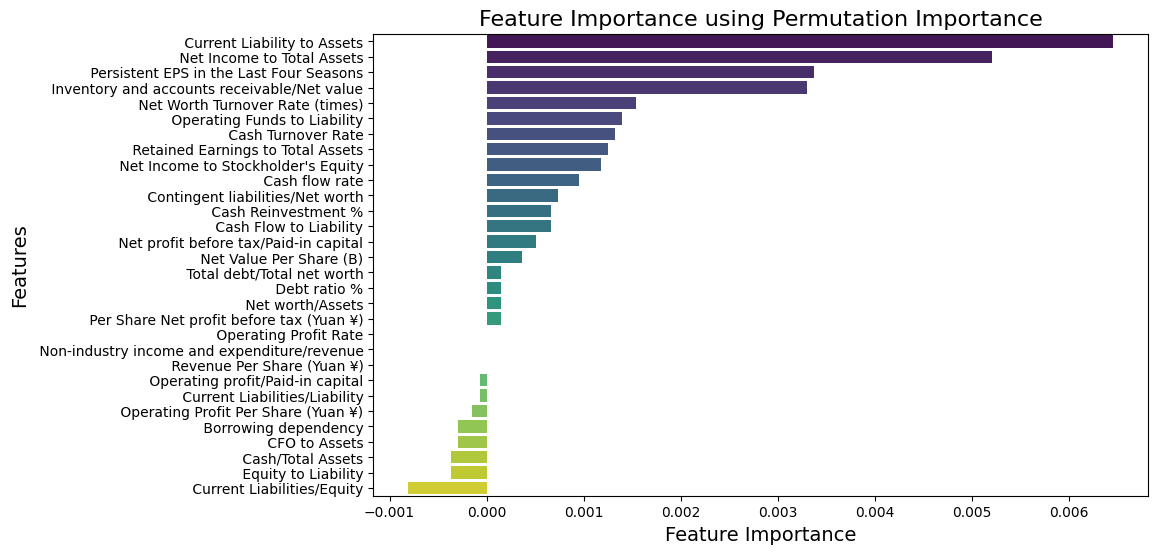

In [54]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.sort_values(by='Importance', ascending=False), palette='viridis')

plt.title('Feature Importance using Permutation Importance', fontsize=16)
plt.xlabel('Feature Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)

plt.show()

**Interpretation**



*  Features like Current Liability to Assets, Net Income to Total Assets, and Persistent EPS in the Last Four Seasons have the biggest impact on the model’s predictions.


*   Features like Equity to Liability and Cash/Total Assets have little effect on the predictions and don’t add much value to the model.


**Surrogate Decision Tree Model**



*   A surrogate model (decision tree) is trained to approximate the decisions of a more complex model like Logistic Regression.
*   Surrogate models help us understand complex models by creating a simpler, interpretable model that approximates the predictions of the original model.





In [107]:
from sklearn.tree import DecisionTreeClassifier


In [108]:
X_train_selected = X_train[:, rfe.support_]

In [109]:
surrogate_model = DecisionTreeClassifier(max_depth=3)
surrogate_model.fit(X_train_selected, log_reg_model.predict(X_train_selected))

DecisionTreeClassifier(max_depth=3)

In [110]:
X_test_selected = X_test[:, rfe.support_]
y_pred_surrogate = surrogate_model.predict(X_test_selected)

In [111]:
accuracy = accuracy_score(log_reg_model.predict(X_test_selected), y_pred_surrogate)
print(f"Accuracy of surrogate model: {accuracy:.4f}")

Accuracy of surrogate model: 0.9934


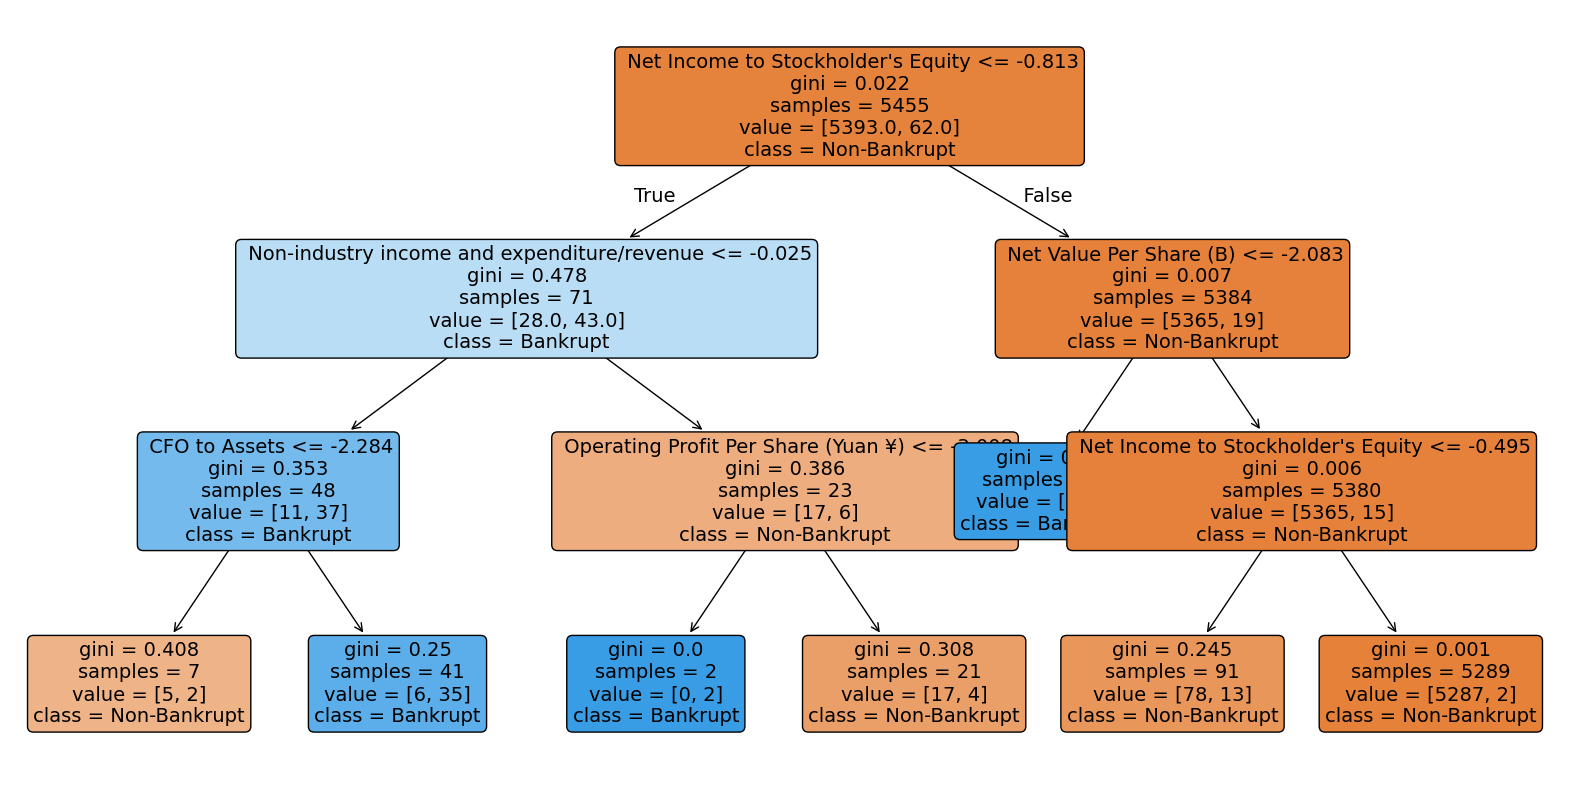

In [112]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(surrogate_model, filled=True, feature_names=selected_features, class_names=['Non-Bankrupt', 'Bankrupt'], rounded=True, fontsize=14)
plt.show()

**Interpretation**



1.  It starts by checking **Net Income to Stockholder's Equity**.

2.   Depending on its value, the tree branches into different features like **Net Value Per Share** and **Non-industry income and expenditure/revenue**.


3. The leaf nodes at the bottom of the tree give the final prediction **(Bankrupt or Non-Bankrupt).**

4.   The Gini index shows how pure each decision is.


In [113]:
feature_importance = pd.DataFrame({'Feature': selected_features, 'Importance': surrogate_model.feature_importances_})
feature_importance_sorted = feature_importance.sort_values(by='Importance', ascending=False)

<ipython-input-114-4e2a16d6ea0c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_sorted, palette='viridis')


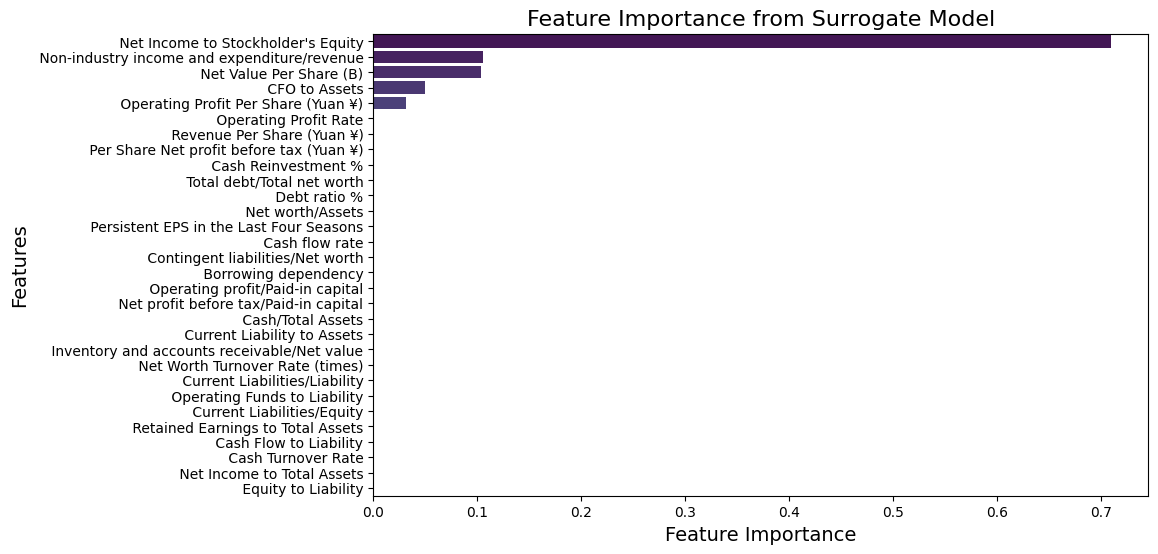

In [114]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_sorted, palette='viridis')

plt.title('Feature Importance from Surrogate Model', fontsize=16)
plt.xlabel('Feature Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)

plt.show()

**Interpretation**



*  Based on a simpler model (decision tree) that approximates the original model's behavior.

*   Shows how each feature impacts the surrogate model’s predictions.


*   The features like **"Net Income to Stockholder's Equity" and "Non-industry income and expenditure/revenue**" are most important.



